# Brazilian Ecommerce Olist data collection and pre-processing

The data is collected from [Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce). This dataset consists of real transaction data of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. 

We have a total of nine CSV files and below is the data diagram:
<figure>
<img src="kaggel olist data.png" style="width:100%">
<figcaption align = "center"> Source of the image:https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce </figcaption>
</figure>

**Our aim in this notbook is:**
- To get a high level picture of dataset we have.
- Check for null and duplicates.
- Preserve as much data and information as we can using imputation so that we can do time series forecasting, do broad level analysis and later apply other machine learning modelling as this data has lots of vital information for the business.
- Create a final data wireframe after merging all the individual dataset.

# Index

[1. Importing Libraries](#Importing_libraries) </br>
[2. Importing Data](#Importing_Data)</br>
[3. Reading each dataframe separately](#reading) </br>
$\;\;\;\;$    [3.1 Customer Dataset](#customer_dataset)</br>
$\;\;\;\;$    [3.2 Geoloc Dataset](#geoloc_dataset) </br>
$\;\;\;\;$    [3.3 Seller Dataset](#seller_dataset) </br>
$\;\;\;\;$    [3.4 Payments Dataset](#payment_dataset) </br>
$\;\;\;\;$    [3.5 Order item Dataset](#order_item_dataset) </br>
$\;\;\;\;$    [3.6 Order Dataset](#order_dataset) </br>
$\;\;\;\;$    [3.7 Product Dataset](#product_dataset) </br>
$\;\;\;\;$    [3.8 Review Dataset](#review_dataset) </br>
$\;\;\;\;$    [3.9 Product_eng Dataset](#eng_dataset) </br>
[4. Joining all the tables](#joining_tables)</br>
[5. Scraping holiday data](#scraping) </br>

## 1. Importing Libraries

<a id = 'Importing_libraries' ></a>

In [185]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style= 'darkgrid')

We will start with loading all the individual dataset and try to do following tasks:

   - Understand data dictionary to get an overview of numerical and categorical columns.
   - Correct the data format.
   - Clean the data by deleting redundant columns, imputing the null values and deleting the duplicate rows and columns.

## 2. Importing Data

<a id = 'Importing_Data' ></a>

In [186]:
#loading all the datasets
customers=pd.read_csv('data/olist_customers_dataset.csv')
geoloc=pd.read_csv('data/olist_geolocation_dataset.csv')
order_items=pd.read_csv('data/olist_order_items_dataset.csv')
payments=pd.read_csv('data/olist_order_payments_dataset.csv')
reviews=pd.read_csv('data/olist_order_reviews_dataset.csv')
orders=pd.read_csv('data/olist_orders_dataset.csv')
products=pd.read_csv('data/olist_products_dataset.csv')
sellers=pd.read_csv('data/olist_sellers_dataset.csv')
product_eng=pd.read_csv('data/product_category_name_translation.csv')

Let us quickly check the shape of each table.

In [187]:
#shape of the each dataframe
print(f"The customers data set has {customers.shape[0]} rows and {customers.shape[1]} columns.")
print(f"The geoloc data set has {geoloc.shape[0]} rows and {geoloc.shape[1]} columns.")
print(f"The sellers data set has {sellers.shape[0]} rows and {sellers.shape[1]} columns.")
print(f"The payments data set has {payments.shape[0]} rows and {payments.shape[1]} columns.")
print(f"The order_items data set has {order_items.shape[0]} rows and {order_items.shape[1]} columns.")
print(f"The orders data set has {orders.shape[0]} rows and {orders.shape[1]} columns.")
print(f"The products data set has {products.shape[0]} rows and {products.shape[1]} columns.")
print(f"The reviews data set has {reviews.shape[0]} rows and {reviews.shape[1]} columns.")
print(f"The product_eng data set has {product_eng.shape[0]} rows and {product_eng.shape[1]} columns.")

The customers data set has 99441 rows and 5 columns.
The geoloc data set has 1000163 rows and 5 columns.
The sellers data set has 3095 rows and 4 columns.
The payments data set has 103886 rows and 5 columns.
The order_items data set has 112650 rows and 7 columns.
The orders data set has 99441 rows and 8 columns.
The products data set has 32951 rows and 9 columns.
The reviews data set has 99224 rows and 7 columns.
The product_eng data set has 71 rows and 2 columns.


## 3. Reading each dataframe separately

<a id = 'reading' ></a>

Let us start with reading the customer dataset.

## 3.1 Customers dataset

<a id = 'customer_dataset' ></a>

In [188]:
#reading head and tail of the customer dataframe
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [189]:
#reading the tail
customers.tail()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


In [190]:
#getting overview of datasets that we have.
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [191]:
#checking the null values
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [192]:
#checking duplicates across rows
customers.duplicated().sum()

0

In [193]:
#checking duplicates across columns
customers.T.duplicated().sum()

0

In [194]:
#checking the unique values in column customer unique id and customer id
customers['customer_id'].nunique()

99441

In [195]:
#checking the number of unique customers
customers['customer_unique_id'].nunique()

96096

In [196]:
#Repeat customers
99441-96096

3345

In [197]:
#percentage of repeat customers
96096/99441

0.9663619633752677

#### Quick findings:

- Customers dataset has information about geolocation of customers.
- We have a total of 99441 customer ids which is the primary key for this table. These customers ids are created when a user makes a purchase. They are actually transaction ids.
- We have a total of 96096 unique customer ids. It shows that we have around 96.6 % of new customers. Only 3.4% of the customers have made repeat purchase from the olist platform. It is because olist was founded in 2015 and they started selling online in 2016. The data we downloaded from Kaggel is from 2016 to 2018, when it was fairly new thus we only have new customers.
- This dataset has **four** columns of object datatype and **one** column with numeric datatype.
- There are no duplicates across rows or columns.
- There is no null value.

## 3.2 Geoloc dataset
<a id = 'geoloc_dataset' ></a>
We can look at the Geoloc dataset and see what important columns we can utilize later.

In [198]:
#reading head and tail of the geoloc dataframe
geoloc.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [199]:
#reading the tail
geoloc.tail()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS
1000162,99950,-28.070104,-52.018658,tapejara,RS


In [200]:
#getting overview of datasets that we have.
geoloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [201]:
#checking the null values
geoloc.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [202]:
#checking duplicates across rows
geoloc.duplicated().sum()

261831

We have a huge number of duplicates here. We can drop the duplicates only keeping the first of the matching row.

In [203]:
#checking duplicates across rows by keeping only the frist value and dropping the next matching value in place
geoloc.drop_duplicates(keep='first', inplace=True)

In [204]:
#checking duplicates across rows
geoloc.duplicated().sum()

0

In [205]:
#checking duplicates across columns 
#it has been commented as it took a lot of time to get the result
#during first check we found no duplicates across columns
# geoloc.T.duplicated().sum()

In [206]:
geoloc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


In [207]:
#checking the unique values in geolocation_zip_code_prefix
geoloc['geolocation_zip_code_prefix'].nunique()

19015

Out of 738332 rows only 19015 are the unique zip code prefix. A zip code postfix can define a complete zip code but we don't have any. For sanity check we can check how many different latitude and longitude values do we have for a particular zip code prefix.

In [208]:
#checking no of rows with same zip code.
geoloc['geolocation_zip_code_prefix'].value_counts()

geolocation_zip_code_prefix
38400    779
35500    751
11680    727
11740    678
36400    627
        ... 
90038      1
90002      1
29174      1
72230      1
45824      1
Name: count, Length: 19015, dtype: int64

In [209]:
#quickly checking latitude and logitude values for a zipcode 38400
geoloc[geoloc['geolocation_zip_code_prefix']==38400]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
645450,38400,-18.915960,-48.278974,uberlandia,MG
645456,38400,-18.900442,-48.260759,uberlandia,MG
645460,38400,-18.913015,-48.262132,uberlandia,MG
645461,38400,-18.922381,-48.282111,uberlandia,MG
645471,38400,-18.922160,-48.271125,uberlandia,MG
...,...,...,...,...,...
650433,38400,-18.913148,-48.288200,uberlândia,MG
650434,38400,-18.915238,-48.297562,uberlandia,MG
650439,38400,-18.898682,-48.260058,uberlândia,MG
650440,38400,-18.887050,-48.265336,uberlandia,MG


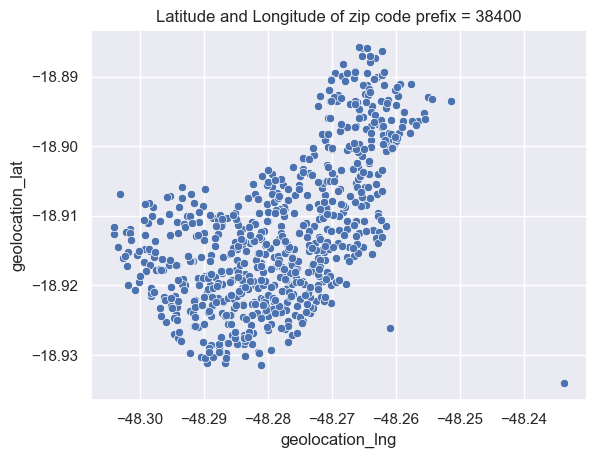

In [210]:
plt.title('Latitude and Longitude of zip code prefix = 38400')
sns.scatterplot(data= geoloc[geoloc['geolocation_zip_code_prefix']==38400], y='geolocation_lat', x='geolocation_lng' )
plt.show()

#### Quick findings:

- Geoloc dataset has information about latitudes and longitudes of various cities and states of Brazil.
- We have a total of 19015 unique zip code prefix and there could be multiple latitude and longitude associated with that code that differentiate different locations within that zip code.
    - For example for zip code prefix 38400 we have **779 rows with same city and state value but slightly different latitutde and longitude values.**
- We found some duplicate values and deleted them.
- This dataset has **two** columns of object datatype and **three** column with numeric datatype.
- There is no null value.

**Since we don't have the complete zip code in both geoloc and customer dataset, we can take mean of the latitude and longitude coordinates for each zip code prefix and save it in separate dataframe.**

In [211]:
#creating another dataframe which has zip code prefix and mean values for latitude and longitude
coordinates= geoloc.groupby('geolocation_zip_code_prefix')[['geolocation_lat', 'geolocation_lng']].mean().reset_index()

In [212]:
coordinates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 445.8 KB


### Merging the coordinates dataframe with the customer dataframe

In [213]:
#merging coordinates and customer
customer_loc=pd.merge(left=customers, right=coordinates, left_on='customer_zip_code_prefix', 
                      right_on='geolocation_zip_code_prefix', how='left')

In [214]:
#checking info
customer_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  99441 non-null  object 
 1   customer_unique_id           99441 non-null  object 
 2   customer_zip_code_prefix     99441 non-null  int64  
 3   customer_city                99441 non-null  object 
 4   customer_state               99441 non-null  object 
 5   geolocation_zip_code_prefix  99163 non-null  float64
 6   geolocation_lat              99163 non-null  float64
 7   geolocation_lng              99163 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.1+ MB


In [215]:
#drop unnecesary column
customer_loc.drop(columns=['geolocation_zip_code_prefix'], inplace=True)

In [216]:
#reading the head
customer_loc.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.499273,-47.396658
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.728396,-46.542250
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531309,-46.656690
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.500670,-46.186348
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975708,-47.143140


In [217]:
#renaming the coluumn name
customer_loc.rename(columns = {'geolocation_lat':'customer_lat', 'geolocation_lng': 'customer_lng' }, inplace = True)

In [218]:
#checking the null values
customer_loc.isnull().sum()

customer_id                   0
customer_unique_id            0
customer_zip_code_prefix      0
customer_city                 0
customer_state                0
customer_lat                278
customer_lng                278
dtype: int64

In [219]:
#plotting customer citu and state to see city and state with null values
# customer_loc[customer_loc['customer_lat'].isnull()][['customer_city', 'customer_state']].value_counts().plot(kind='bar', figsize=(20,10))

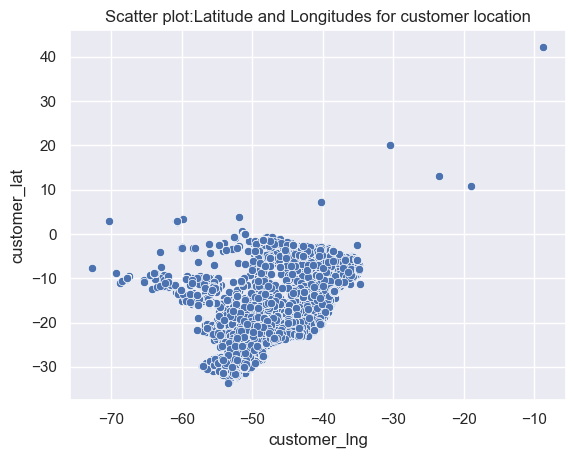

In [220]:
sns.scatterplot(data=customer_loc, y='customer_lat', x='customer_lng')
plt.title('Scatter plot:Latitude and Longitudes for customer location')
plt.show()

In [221]:
#separating the coordinates which have NAN
nan_coord=customer_loc[customer_loc['customer_lat'].isnull()]

The approach we are using to fill NANs:

- We will aggreagate the columns on the basis of customer city and state and we will calculate the mean of the available latitude and longitude for that city state combination.
- Using these calaculated latitude and longitudes we will fill the missing latitude and longitude where the city and state is matching. 

In [222]:
#a dataframe to save the mean of latitude and longitude for city-state combination
d_tally= customer_loc.groupby(['customer_city', 'customer_state'])[['customer_lat', 'customer_lng'] ].mean().reset_index()

In [223]:
#checking for null
d_tally.isnull().sum()

customer_city      0
customer_state     0
customer_lat      51
customer_lng      51
dtype: int64

We thought that we will not have any nulls here, but we have 51 null values. We can fill these values using the mean of latitude and longitude for group i.e customer state.

In [224]:
#d_tally head
d_tally.head()

,customer_city,customer_state,customer_lat,customer_lng
0,abadia dos dourados,MG,-18.477752,-47.406319
1,abadiania,GO,-16.193718,-48.709452
2,abaete,MG,-19.158364,-45.446897
3,abaetetuba,PA,-1.723644,-48.881349
4,abaiara,CE,-7.355970,-39.043267


In [225]:
# grouping by customer state and imputing the misisng latitude by mean of that group or customer state
d_tally['customer_lat']=d_tally.groupby('customer_state', sort=False)['customer_lat'].transform(lambda x: x.fillna(x.mean()))

In [226]:
# grouping by customer state and imputing the misisng longitude by mean of that group or customer state
d_tally['customer_lng']=d_tally.groupby('customer_state', sort=False)['customer_lng'].transform(lambda x: x.fillna(x.mean()))

In [227]:
#checking for missing values
d_tally.isnull().sum()

customer_city     0
customer_state    0
customer_lat      0
customer_lng      0
dtype: int64

Now, we can fill the missing latitude and longitudes using the latitude and longitude value available in our d_tally table where the city matches with the city of customer table. I am proceeding with this step on the assumption that none of the cities from different states have same name.

In [228]:
for i in nan_coord.index:
    customer_loc.loc[i, 'customer_lat']=d_tally[d_tally['customer_city']==customer_loc.loc[i, 'customer_city']]['customer_lat'].values[0]
    customer_loc.loc[i, 'customer_lng']=d_tally[d_tally['customer_city']==customer_loc.loc[i, 'customer_city']]['customer_lng'].values[0]

In [229]:
#checking if we still have any null value
customer_loc.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
customer_lat                0
customer_lng                0
dtype: int64

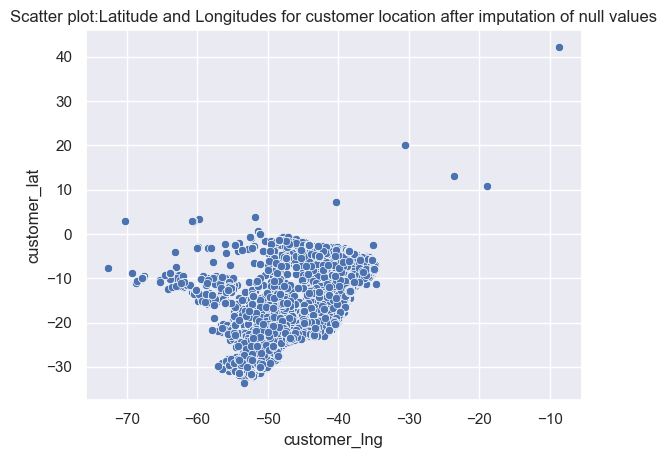

In [230]:
sns.scatterplot(data=customer_loc, y='customer_lat', x='customer_lng')
plt.title('Scatter plot:Latitude and Longitudes for customer location after imputation of null values')
plt.show()

In [231]:
#let us save it into a file
customer_loc.to_csv('data_cleaned/customer_loc_cleaned_dataset.csv', index=False)

## 3.3 Sellers dataset

<a id = 'seller_dataset' ></a>

In [232]:
#reading head and tail of the sellers dataframe
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [233]:
sellers.tail()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS
3094,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP


In [234]:
#getting overview of datasets that we have.
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [235]:
#checking the null values
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [236]:
#checking duplicates across rows
sellers.duplicated().sum()

0

In [237]:
#checking duplicates across columns
sellers.T.duplicated().sum()

0

In [238]:
#checking the unique values in column unique id and customer id
sellers['seller_id'].nunique()

3095

#### Quick findings:

- Sellers dataset has information about seller location.
- We have a total of 3095 unique seller ids which is the primary key for this dataset 
- This dataset has **three** columns of object datatype and **one** column with numeric datatype.
- There are no duplicates across rows or columns.
- There is no null value.

### Merging the coordinates dataframe with the seller dataframe

In [239]:
#merging the dataframes
seller_loc=pd.merge(left=sellers, right=coordinates, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

In [240]:
#dropping unnecessary column
seller_loc.drop(columns=['geolocation_zip_code_prefix'], inplace=True)

In [241]:
seller_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   seller_id               3095 non-null   object 
 1   seller_zip_code_prefix  3095 non-null   int64  
 2   seller_city             3095 non-null   object 
 3   seller_state            3095 non-null   object 
 4   geolocation_lat         3088 non-null   float64
 5   geolocation_lng         3088 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 145.2+ KB


In [242]:
#renaming column name
seller_loc.rename(columns = {'geolocation_lat':'seller_lat', 'geolocation_lng': 'seller_lng' }, inplace = True)

In [243]:
#checking null values
seller_loc.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
seller_lat                7
seller_lng                7
dtype: int64

We only have 7 rows with null values. Since this is a small number we can find out the cities which are missing these values.

In [244]:
#cities which are missing coordinates.
seller_loc.loc[seller_loc['seller_lat'].isnull()]

,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng
473,5962468f885ea01a1b6a97a218797b0a,82040,curitiba,PR,NaN,NaN
791,2aafae69bf4c41fbd94053d9413e87ee,91901,porto alegre,RS,NaN,NaN
1672,2a50b7ee5aebecc6fd0ff9784a4747d6,72580,brasilia,DF,NaN,NaN
1931,2e90cb1677d35cfe24eef47d441b7c87,2285,sao paulo,SP,NaN,NaN
2182,0b3f27369a4d8df98f7eb91077e438ac,7412,aruja,SP,NaN,NaN
2986,42bde9fef835393bb8a8849cb6b7f245,71551,brasilia,DF,NaN,NaN
3028,870d0118f7a9d85960f29ad89d5d989a,37708,pocos de caldas,MG,NaN,NaN


There are seven cities which are missing the values: Curitiba, Porto Alegre, Brasilia, Sao Paulo, Aruja, Pocos de caldas.
We will calaculate the mean latitude and longitude values for these cities and fill the missing values.  I am proceeding with this step on the assumption that none of the cities from different states have same name.

In [245]:
seller_loc['seller_city'].value_counts()

seller_city
sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: count, Length: 611, dtype: int64

In [246]:
#checking if we have mean latitude and longitude values for these cities
seller_loc[(seller_loc['seller_city']== 'sao paulo') | (seller_loc['seller_city']== 'curitiba') |
(seller_loc['seller_city']== 'porto alegre') | (seller_loc['seller_city']== 'brasilia') |
(seller_loc['seller_city']== 'aruja') | (seller_loc['seller_city']== 'pocos de caldas')]. \
groupby('seller_city')[['seller_zip_code_prefix', 'seller_lat', 'seller_lng']].mean()

,seller_zip_code_prefix,seller_lat,seller_lng
seller_city,,,
aruja,7404.666667,-23.396249,-46.319178
brasilia,71520.928571,-15.805680,-47.962067
curitiba,81194.370079,-25.452713,-49.277135
pocos de caldas,37705.600000,-21.811821,-46.557979
porto alegre,90875.392857,-30.036305,-51.190150
sao paulo,3951.201729,-23.548343,-46.629935


In [247]:
#saving the calaculation from above in separate dataframe
sdb=seller_loc.groupby('seller_city')[['seller_zip_code_prefix', 'seller_lat', 'seller_lng']].mean().reset_index()

We can impute the missing latitude and longitude values with the mean latitude and longitude values at these cities.

In [248]:
for i in seller_loc[seller_loc['seller_lat'].isnull()].index:
    seller_loc.loc[i, 'seller_lat']=sdb[sdb['seller_city']==seller_loc.loc[i, 'seller_city']]['seller_lat'].values[0]
    seller_loc.loc[i, 'seller_lng']=sdb[sdb['seller_city']==seller_loc.loc[i, 'seller_city']]['seller_lng'].values[0]

In [249]:
#checking for null
seller_loc.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
seller_lat                0
seller_lng                0
dtype: int64

Save the cleaned seller location data in seller_loc_cleaned csv file and similary save the cleaned customer location data.

In [250]:
# save the cleaned data to file
seller_loc.to_csv('data_cleaned/seller_loc_cleaned_dataset.csv', index=False)

## 3.4 Payments dataset

<a id = 'payment_dataset' ></a>

In [251]:
#reading head and tail of the payments dataframe
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [252]:
payments.tail()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
103885,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58


In [253]:
#getting overview of datasets that we have.
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [254]:
#checking the null values
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [255]:
#checking duplicates across rows
payments.duplicated().sum()

0

In [256]:
#checking duplicates across columns
payments.T.duplicated().sum()

0

In [257]:
#checking if we have payment details for all 99441 customers and their orders.
payments['order_id'].nunique()

99440

In [258]:
payments['payment_type'].value_counts(normalize=True).index.tolist()

['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined']

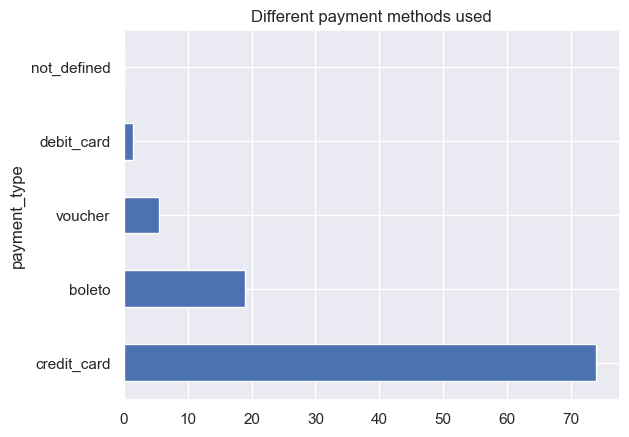

In [259]:
(payments['payment_type'].value_counts(normalize=True)*100).plot(kind='barh')
plt.title('Different payment methods used')
plt.show()

#### Quick findings:

- Payments dataset has information about the way customer made payment for each order.
- We have a total of 99441 customer id which is equal to the total order ids but we have payment information for 99440 orders.
- This dataset has **three** columns of object datatype and **two** column with numeric datatype.
- There are no duplicates across rows or columns.
- There is no null value.
- order_id is the foreign key in this table.

We will keep this table aside beacuse we are not interested in this table for our present scope of work.

## 3.5 Order item dataset

<a id = 'order_item_dataset' ></a>

In [260]:
#reading head and tail of the order item dataframe
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [261]:
order_items.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


In [262]:
#getting overview of datasets that we have.
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [263]:
#checking the null values
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [264]:
#checking duplicates across rows
order_items.duplicated().sum()

0

In [265]:
#checking duplicates across columns
order_items.T.duplicated().sum()

0

In [266]:
#checking the unique values in column order_id and order_item_id
order_items['order_id'].nunique()

98666

In [267]:
#difference in order number as compared to total orders
99441-98666

775

In [268]:
order_items['order_item_id'].nunique()

21

#### Quick findings:

- Order item dataset has information about order item. It tells us about number of items in each order, shipping limit and fright value
- We have a total of 98666 order ids which is less than 99441. 
- This dataset has **four** columns of object datatype and **three** column with numeric datatype.
- The column shipping limit date is of date time format so we need to convert it into correct format.
- There are no duplicates across rows or columns.
- There is no null values.

## 3.6 Order dataset
<a id = 'order_dataset' ></a>

In [269]:
#reading head and tail of the order dataframe
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [270]:
orders.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


In [271]:
#getting overview of datasets that we have.
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [272]:
#checking the null values
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [273]:
orders.isnull().sum().sum()

4908

In [274]:
#checking duplicates across rows
orders.duplicated().sum()

0

In [275]:
#checking duplicates across columns
orders.T.duplicated().sum()

0

In [276]:
#checking the unique values in order id and customer id
orders['order_id'].nunique()

99441

#### Quick findings:

- Orders dataset has information about the orders. Each order contains a customer id, order status, purchase timestamp and actual and estimated delivery information.
- We have a total of 99441 unique orders which is the primary key for this table. 
- This dataset has **eight** columns of object datatype.
- **There are a total of five columns of date time values but saved in object format. We need to convert them into date time format.**
- There are no duplicates across rows or columns.
- There are null values in the order_approved_at, order_delivered_carrier_date, and order_delivered_customer_date.

We have null values in 3 columns: order_approved_at, order_delivered_carrier_date, and order_delivered_customer_date. Does it have to do anything with the Order status? 

In [277]:
#convert all the rows with date time data to date-time format.
orders['order_purchase_timestamp']=pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at']=pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date']=pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date']=pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date']=pd.to_datetime(orders['order_estimated_delivery_date'])

In [278]:
#percentage of values that are missing
orders.isnull().mean()*100

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

The percentage of missing values is very less. We want to get the best out of available data. So we will try to find a way to impute these values. There is a chance that order status can be a reason for these missing values so let us explore it further.

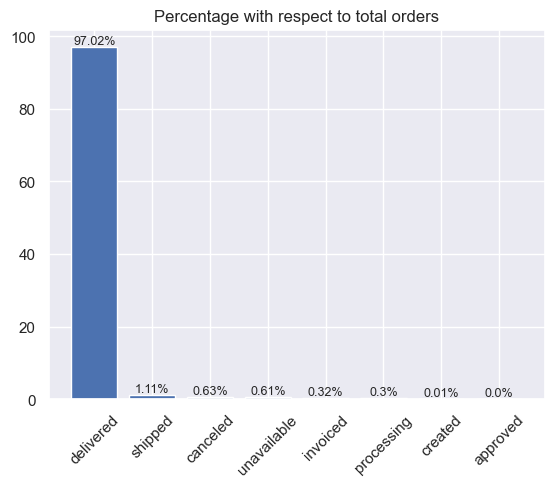

In [279]:
#percentage of order according to different order status
order_st_per= round(orders['order_status'].value_counts(normalize=True)*100, 2)

#ploting the orders to visually check what all status do we have.
plt.figure()
graph=plt.bar(order_st_per.index, order_st_per.values)
plt.title("Percentage with respect to total orders")
plt.xticks(rotation=45)
for p in graph:
    height=p.get_height()
    plt.annotate( "{}%".format(height),(p.get_x() + p.get_width()/2, height+.05),ha="center",va="bottom",fontsize=9)
plt.show()

We have a total of eight order status. Our data has 97% of orders that were delivered. Only 0.63% of orders were cancelled. There are diferent order status that specify at which stage our order is.

We want to understand if there is any relationship with missing values and the order status. We will filter the rows with missing values and check what is the status of that order.

In [280]:
#checking the status where all the values are missing
orders.loc[orders['order_delivered_customer_date'].isnull() & \
           orders['order_delivered_carrier_date'].isnull() & \
           orders['order_approved_at'].isnull() ]['order_status'].value_counts()

order_status
canceled    141
created       5
Name: count, dtype: int64

In [281]:
#checking the status where both order delivered customer and delivered carrier are missing
orders.loc[orders['order_delivered_customer_date'].isnull() & \
           orders['order_delivered_carrier_date'].isnull()]['order_status'].value_counts()

order_status
unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        1
Name: count, dtype: int64

In [282]:
#checking the status where only order delivered customer is missing
orders.loc[orders['order_delivered_customer_date'].isnull()]['order_status'].value_counts()

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: count, dtype: int64

In [283]:
#checking the status where only order delivered carrier is missing
orders.loc[orders['order_delivered_carrier_date'].isnull()]['order_status'].value_counts()

order_status
unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: count, dtype: int64

In [284]:
#checking the status where only order approved is missing
orders.loc[orders['order_approved_at'].isnull()]['order_status'].value_counts()

order_status
canceled     141
delivered     14
created        5
Name: count, dtype: int64

In [285]:
#checking the status where both order approved and order delivered cautomer are missing
orders.loc[orders['order_approved_at'].isnull() & 
           orders['order_delivered_customer_date'].isnull() ]['order_status'].value_counts()

order_status
canceled    141
created       5
Name: count, dtype: int64

#### Different kind of order status and my understanding:


| Order_status | Number | Description | Findings about missing values |
|--- | --- | --- | --- |
| delivered | 96478 | End stage, order has been delivered to end customer |  Some are missing but not a clear understanding about them|
| shipped | 1107 | Order has been shipped to warehouse and handled to the logistic partner for delivery to end customer | order_delivered_customer_date (1107 Nos) |
| canceled | 625 | Orders cancelled by customer after making payment.  |Some are missing but not a clear understanding about them|
| unavailable | 609 | We don't know the status, we have exactly the same number of missing records for order delivered carrier date and order delivered customer date as the number of rows with unavailable status | Both order delivered carrier date and order delivered customer date (609 Nos) |
| invoiced | 314 | A bill has been created and is sent out with the order  | Both order delivered carrier date and order delivered customer date (314 Nos) |
| processing | 301 | A step before invoicing | Both order delivered carrier date and order delivered customer date (301 Nos) |
| created | 5 | These orders are created recently, their payments have been made but seller has not approved the order yet. | All of order approved at, order delivered carrier date, and  order delivered customer date (5 Nos) |
| approved | 2 | These orders are recently approved by the seller and need further process like invoicing and shipping | Both order delivered carrier date and order delivered customer date (2 Nos) |


Customer made payment for the order &rarr; Order created

Seller approved the order &rarr; Order approved

Seller preparing the order &rarr; Order processing

Seller invoiced the order &rarr; Order invoiced

Seller shipped the order and was handed over to logistic partner &rarr; Order shipped

Logistic partner delivered the product to end customer &rarr; Order delivered


**We might not need the rows with order status as `unavailable`, `invoiced`, `processing`, `created`, `approved`, `shipped` so we will go ahead and delete these rows.** Logically these rows are missing the correct values as per the status. If we were to impute the missing values then we will have to change the status also. These rows have very less number compared to the total rows and there should not be much effect after removing these rows.  


**Need to impute the missing values for `delivered` and `canceled` order status**


In [286]:
#deleting the redundant values.
index_redundant_status= orders[(orders['order_status']=='invoiced') | (orders['order_status']=='processing') | 
       (orders['order_status']=='created') | (orders['order_status']=='approved') | (orders['order_status']=='unavailable') |
       (orders['order_status']=='shipped')].index

In [287]:
#drop the redundant rows
orders.drop(index_redundant_status, inplace=True)

In [288]:
#checking the null values
orders.isnull().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                155
order_delivered_carrier_date     552
order_delivered_customer_date    627
order_estimated_delivery_date      0
dtype: int64

#### How to impute the missing values?
- We can find the difference in days between the known values i.e order_purchase_timestamp and the columns with NANs.
- We can see the distribution of days that we will get from above step by plotting the box plot.
- Then we can decide if we want to impute the missing values with mean, median or mode of the days difference.
- Once we are clear of that, we can determine the missing value by adding the days difference to the order purchase date.

In [289]:
#calculating difference in days between the purchase date and the columns with NANS
diff_est=((orders['order_estimated_delivery_date']-orders['order_purchase_timestamp'])/np.timedelta64(1, 'D')).astype(int)
diff_approved=((orders['order_approved_at']-orders['order_purchase_timestamp'])/np.timedelta64(1, 'D'))
diff_logist=((orders['order_delivered_carrier_date']-orders['order_purchase_timestamp'])/np.timedelta64(1, 'D'))
diff_del=((orders['order_delivered_customer_date']-orders['order_purchase_timestamp'] )/np.timedelta64(1, 'D'))

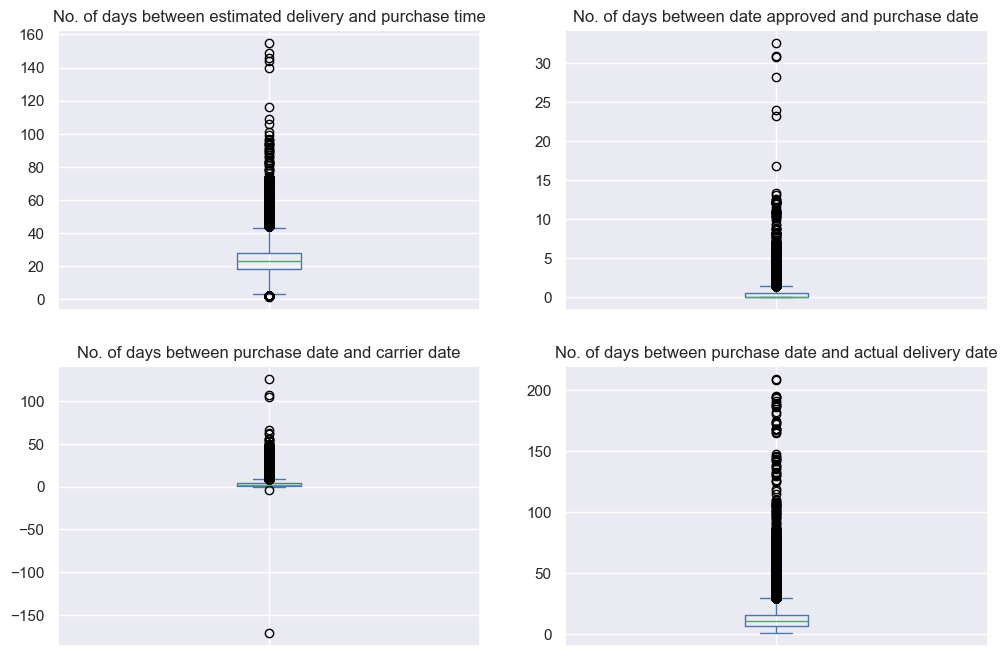

In [290]:
plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
diff_est.plot.box(title='No. of days between estimated delivery and purchase time')

plt.subplot(2, 2, 2)
diff_approved.plot.box(title='No. of days between date approved and purchase date')

plt.subplot(2, 2, 3)
diff_logist.plot.box(title='No. of days between purchase date and carrier date')

plt.subplot(2, 2, 4)
diff_del.plot.box(title='No. of days between purchase date and actual delivery date')
plt.show()

#### Observations:

- We can see that there are a bunch of outliers in these plots.
- The number of days between purchase date and carrier date has a negative observation. If we are assuming that the data is recorded at Olist server where time zone factor has been removed. This is an incorrect observation and can be removed.
- Upon looking at the box plots we have a bunch of outliers and therefore imputation using median is the right approach.

We will simply drop these columns as we do not want to deal with them in our current scope. If we were to impute then we would calaculate the median number of days from each of diff_approved, diff_logist, diff_del and add it to order_purchase_timestamp to get the order_approved_at, order_delivered_carrier_date, order_delivered_customer_date respectively.

In [291]:
orders.drop(columns=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

In [292]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97103 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       97103 non-null  object        
 1   customer_id                    97103 non-null  object        
 2   order_status                   97103 non-null  object        
 3   order_purchase_timestamp       97103 non-null  datetime64[ns]
 4   order_estimated_delivery_date  97103 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 4.4+ MB


## 3.7 Product dataset
<a id = 'product_dataset' ></a>

In [293]:
#reading head and tail of the customer dataframe
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [294]:
products.tail()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0
32950,106392145fca363410d287a815be6de4,cama_mesa_banho,58.0,309.0,1.0,2083.0,12.0,2.0,7.0


In [295]:
#getting overview of datasets that we have.
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [296]:
#checking the null values
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [297]:
products.isnull().sum().sum()

2448

In [298]:
#checking duplicates across rows
products.duplicated().sum()

0

In [299]:
#checking duplicates across columns
products.T.duplicated().sum()

0

In [300]:
#checking the unique values in column unique id and customer id
products['product_category_name'].nunique()

73

In [301]:
products['product_id'].nunique()

32951

#### Quick findings:

- Products dataset has information about product categories, and their attributes.
- We have a total of 32951 products ids which is the primary key for this table. There are a total of 73 product categories.
- This dataset has **two** columns of object datatype and **seven** column with numeric datatype.
- There are no duplicates across rows or columns.
- There are few null values and we need to impute these values.   

#### How can we impute these missing values?

- We have seen that the rows which are missing values, a majority are missing a categorical data ie. product category name and respective, description, name length and photo quantities which are numerical.
- We can find out the rows which are exactly matching the columns (weight, lenght, height, width) and we can fill the null value with the product category name of the matching category. We can fill rest of the values ie product description lenght, product name lenght and photo quantity with either mean, median or mode of that known category.
    - If there are multiple matches for product category, we can filter out the category with most occuring match.
    - If there is no match we can create a separate category **'other'** and fill rest of the values with either of mean, median or mode (determined after making a boxplot).
- We will separate the rows from products dataframe with the missing values in separate dataframe (missing) and create another dataframe (all_values) where there is no null values.
- We will find the element wise match of missing with all_values.
- We only have two rows with missing product weight, height, lenght and width. We will use mean to fill these values.

<Axes: xlabel='product_category_name'>

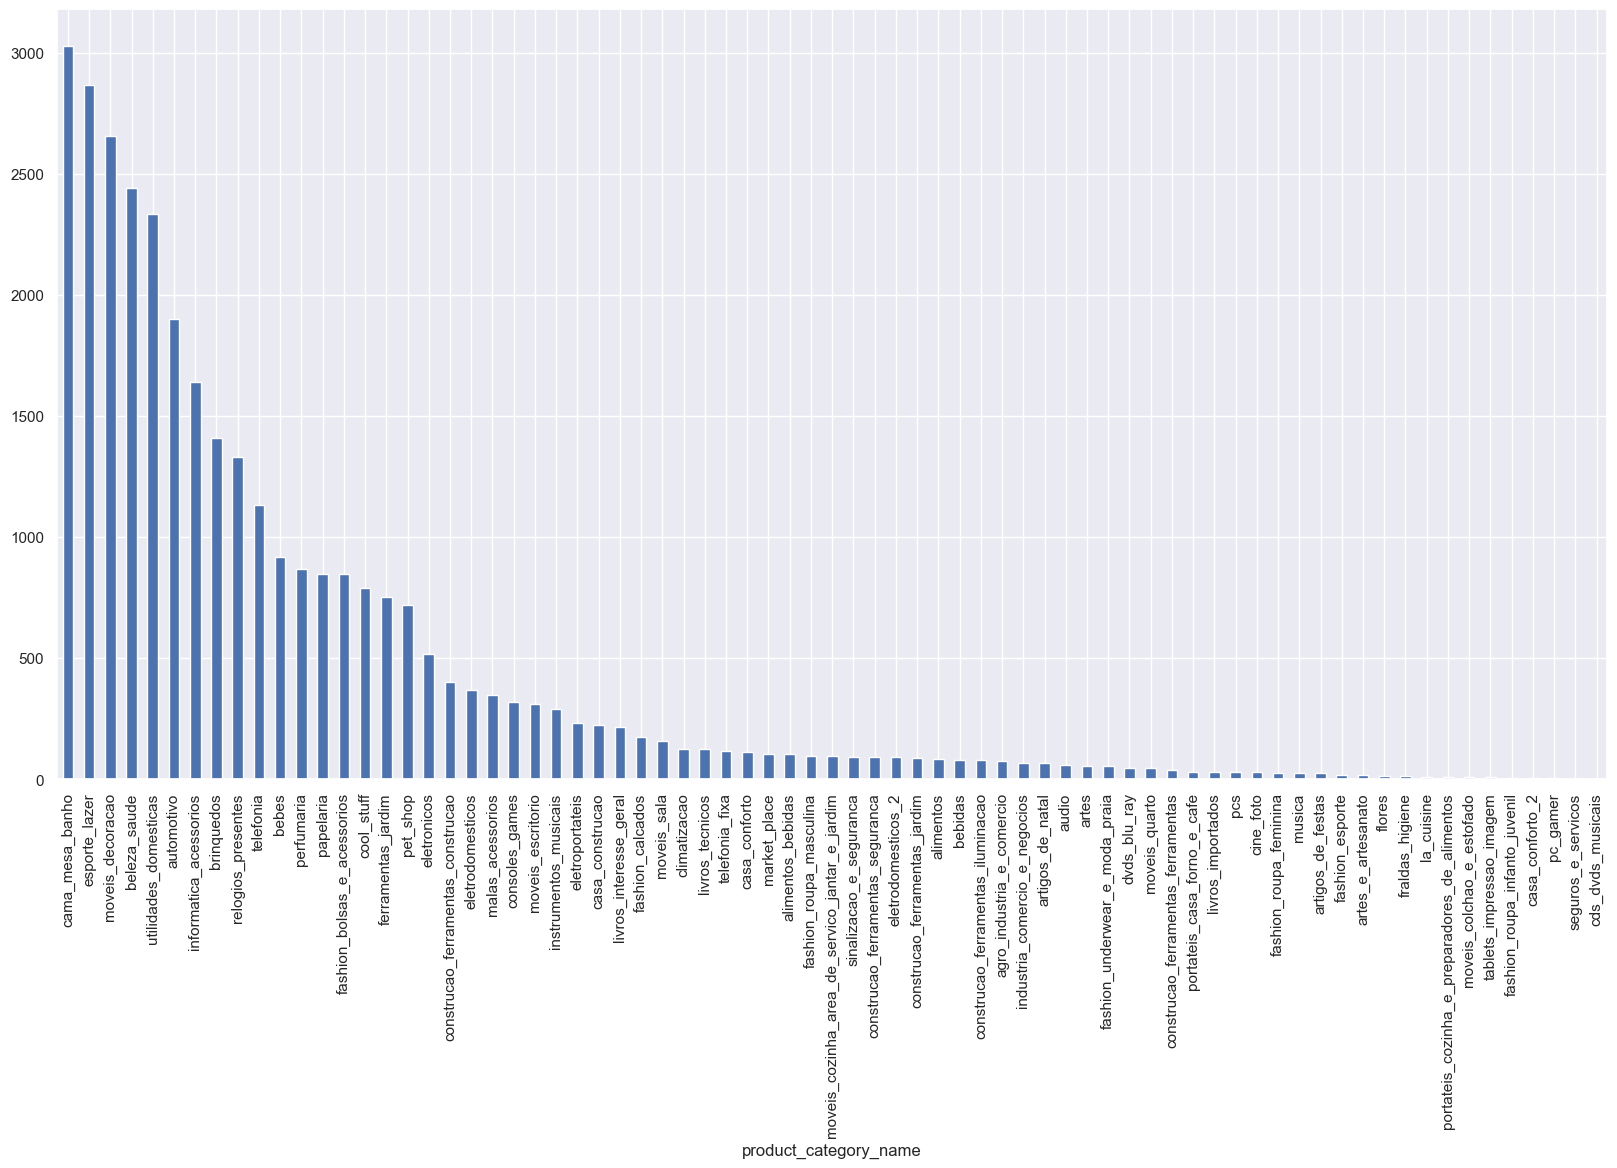

In [302]:
#quickly checking the categories
products['product_category_name'].value_counts().plot(kind='bar', figsize=(20, 10),)

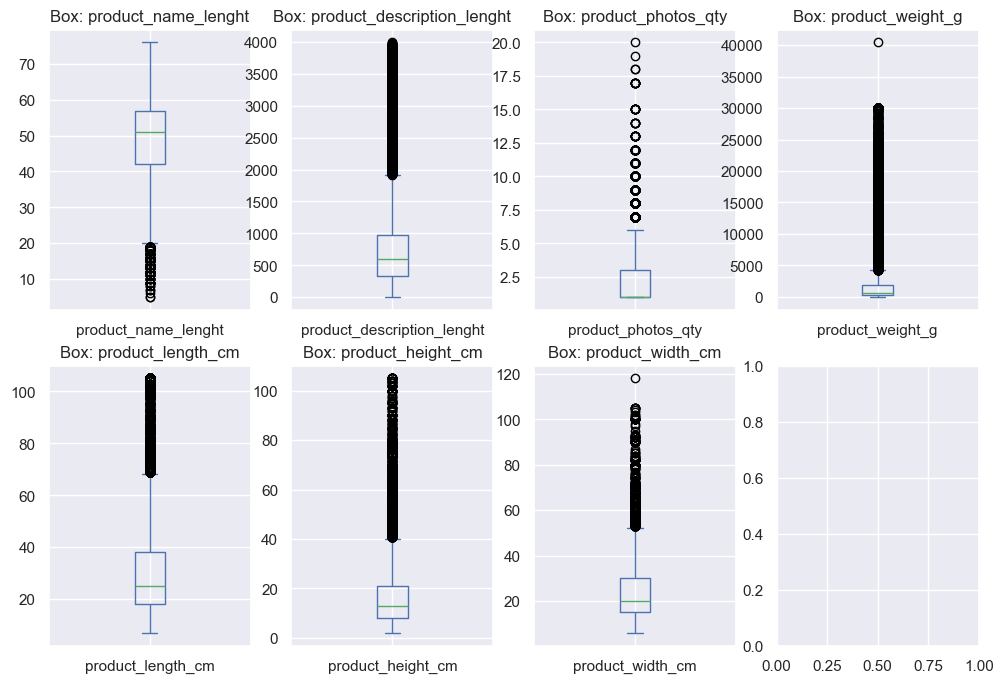

In [303]:
# making box plots for all the numeric columns
fig, axes= plt.subplots(2,4, figsize=(12,8))
numeric=products.select_dtypes(include=np.number).columns
for i, val in enumerate(numeric):
    products[val].plot.box(title=f'Box: {val}', ax=axes.flat[i])

#### Observations:

- We can see from the box plot that there are a bunch of outliers in every box plot. We can use median to impute the missing values.

In [304]:
#separating the missing values and known values
missing=products[products['product_category_name'].isnull()]
all_values= products[products['product_category_name'].notnull()]

#getting the column names for 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'
col=missing.columns[5:]

In [305]:
col

Index(['product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm'],
      dtype='object')

In [306]:
#checking for match and saving the index and values in a dictionary
match=dict()
for i in missing.index:
    if ((all_values.iloc[:, 5]==missing.loc[i, col[0]]) & (all_values.iloc[:, 6]==missing.loc[i, col[1]]) & (all_values.iloc[:, 7]==missing.loc[i, col[2]]) & (all_values.iloc[:, 8]==missing.loc[i, col[3]])).sum()>0:
        #saving the product category which is most occuring
        match[i]=all_values[(all_values.iloc[:, 5]==missing.loc[i, col[0]]) & (all_values.iloc[:, 6]==missing.loc[i, col[1]]) & (all_values.iloc[:, 7]==missing.loc[i, col[2]]) & (all_values.iloc[:, 8]==missing.loc[i, col[3]])]['product_category_name'].value_counts().head(1).index
    else:
        match[i]='empty'

In [307]:
#imputing the missing values
for i in match.keys():
    if match[i]!='empty':
        #where there is a match we are filling the value with median of columns for the category we are assigning
        products.loc[i, 'product_category_name']=match[i][0]
        products.loc[i, 'product_name_lenght']=round(products[products['product_category_name']== match[i][0]]['product_name_lenght'].median())
        products.loc[i, 'product_description_lenght']=round(products[products['product_category_name']== match[i][0]]['product_description_lenght'].median())
        products.loc[i, 'product_photos_qty']=round(products[products['product_category_name']== match[i][0]]['product_photos_qty'].median())
    else:
        #for no match we are filling with other
        products.loc[i, 'product_category_name']='Other'
        products.loc[i, 'product_name_lenght']=round(products['product_name_lenght'].median())
        products.loc[i, 'product_description_lenght']=round(products['product_description_lenght'].median())
        products.loc[i, 'product_photos_qty']=round(products['product_photos_qty'].median())

products['product_weight_g']=products['product_weight_g'].fillna(round(products['product_weight_g'].mean()))
products['product_length_cm']=products['product_length_cm'].fillna(round(products['product_length_cm'].mean()))
products['product_height_cm']=products['product_height_cm'].fillna(round(products['product_height_cm'].mean()))
products['product_width_cm']=products['product_width_cm'].fillna(round(products['product_width_cm'].mean()))

In [308]:
products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## 3.8 Review dataset

<a id = 'review_dataset' ></a>

In [309]:
#reading head and tail of the review dataframe
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [310]:
reviews.tail()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99223,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49


In [311]:
#getting overview of datasets that we have.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [312]:
#checking the null values
reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [313]:
reviews.isnull().sum().sum()

145903

In [314]:
#checking duplicates across rows
reviews.duplicated().sum()

0

In [315]:
#checking duplicates across columns
reviews.T.duplicated().sum()

0

In [316]:
#checking the unique values in column unique id and customer id
reviews['review_id'].nunique()

98410

In [317]:
reviews.shape[0]-reviews['review_id'].nunique()

814

In [318]:
reviews['order_id'].nunique()

98673

In [319]:
98673-98410

263

#### Quick findings:

- Reviews dataset has information about reviews given by the customers. It consists of review score, comment, review creation date and review submission timestamp.
- **We have a total of 99224 review ids of which 98410 are the unique review ids. It means there are 814 reviews which have been resubmitted. These are the ones that need to be tackled.**
- **We have 98673 unique order ids and 98410 unique review ids. It means that there are 263 reviews with same order id. It is possible that these reviews are for different products ordered under same order id.**
- This dataset has **six** columns of object datatype and **one** column with numeric datatype.
- There are no duplicates across rows or columns.
- There are 145903 null values.

## 3.9 Product_eng dataset

<a id = 'eng_dataset' ></a>

In [320]:
#reading head and tail of the customer dataframe
product_eng.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [321]:
product_eng.tail()

,product_category_name,product_category_name_english
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services


In [322]:
#getting overview of datasets that we have.
product_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [323]:
#checking the null values
product_eng.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [324]:
#checking duplicates across rows
product_eng.duplicated().sum()

0

In [325]:
#checking duplicates across columns
product_eng.T.duplicated().sum()

0

### Merging Product_eng with products

We are now joining the product category with english names of the products and dropping the original product category name with names in portugese.

In [326]:
products_final=pd.merge(left=products, right=product_eng, on='product_category_name', how='left')

In [327]:
products_final.isnull().sum()

product_id                         0
product_category_name              0
product_name_lenght                0
product_description_lenght         0
product_photos_qty                 0
product_weight_g                   0
product_length_cm                  0
product_height_cm                  0
product_width_cm                   0
product_category_name_english    406
dtype: int64

In [328]:
#checking the categores where we don't have english name
products_final[products_final['product_category_name_english'].isnull()]['product_category_name'].value_counts()

product_category_name
Other                                            393
portateis_cozinha_e_preparadores_de_alimentos     10
pc_gamer                                           3
Name: count, dtype: int64

In [329]:
products_final.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


We know we can set other to other, we can use google translate to convert rest to english.

**portateis cozinha e preparadores de alimentos** : kitchen and food preparation racks <br/>
**Pc gamer** : PC games

In [330]:
#filling english name of three categories.
products_final.loc[products_final['product_category_name']=='Other', 'product_category_name_english']='Other'
products_final.loc[products_final['product_category_name']=='portateis_cozinha_e_preparadores_de_alimentos', 'product_category_name_english']='kitchen_and_food_preparation_racks'
products_final.loc[products_final['product_category_name']=='pc_gamer', 'product_category_name_english']='PC_games'

In [331]:
products_final.isnull().sum()

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

In [332]:
#dropping the original product category name which is in portugese
products_final.drop(columns=['product_category_name'], inplace=True)

In [333]:
#Saving the final dataset to csv
products_final.to_csv('data_cleaned/products_final_dataset.csv', index=False)
orders.to_csv('data_cleaned/orders_cleaned_dataset.csv', index=False)

## 4. Joining all the tables

<a id = 'joining_tables' ></a>

We will be joining the tables to get a master table for addressing the business problem of Sales prediction.

Starting from the orders dataset, we will first join the order_items and then the products dataset. 

Since we have already cleaned the orders dataset and saved it in a csv file, we will load that data set and start from there.

In [334]:
#loading the cleaned orders dataset.
order_fin=pd.read_csv('data_cleaned/orders_cleaned_dataset.csv')

### Merging Orders and Order_items

In [335]:
#We already have our orders_items data set loaded. Let us join the order_items to order_fin
order_comp= pd.merge(left=order_fin, right= order_items, on= 'order_id', how='inner')

In [336]:
#basic overview
order_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110739 entries, 0 to 110738
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110739 non-null  object 
 1   customer_id                    110739 non-null  object 
 2   order_status                   110739 non-null  object 
 3   order_purchase_timestamp       110739 non-null  object 
 4   order_estimated_delivery_date  110739 non-null  object 
 5   order_item_id                  110739 non-null  int64  
 6   product_id                     110739 non-null  object 
 7   seller_id                      110739 non-null  object 
 8   shipping_limit_date            110739 non-null  object 
 9   price                          110739 non-null  float64
 10  freight_value                  110739 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 9.3+ MB


okay, let us proceed with joining the products table.

### Merging Products table with Order_comp

In [337]:
#loading the final product dataset.
product_fin=pd.read_csv('data_cleaned/products_final_dataset.csv')

In [338]:
#let us join it with order_comp
Order_cons=pd.merge(left=order_comp, right=product_fin, on='product_id', how='inner')

In [339]:
#basic overview
Order_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110739 entries, 0 to 110738
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110739 non-null  object 
 1   customer_id                    110739 non-null  object 
 2   order_status                   110739 non-null  object 
 3   order_purchase_timestamp       110739 non-null  object 
 4   order_estimated_delivery_date  110739 non-null  object 
 5   order_item_id                  110739 non-null  int64  
 6   product_id                     110739 non-null  object 
 7   seller_id                      110739 non-null  object 
 8   shipping_limit_date            110739 non-null  object 
 9   price                          110739 non-null  float64
 10  freight_value                  110739 non-null  float64
 11  product_name_lenght            110739 non-null  float64
 12  product_description_lenght    

### Merging Sellers datset with the Order_cons

Let us add the seller and customer details one by one.

In [340]:
#load the cleaned seller data form cap_data\seller_loc_cleaned_dataset.csv
seller_fin= pd.read_csv('data_cleaned/seller_loc_cleaned_dataset.csv')

In [341]:
#merge the data
order_with_seller=pd.merge(left=Order_cons, right=seller_fin, on='seller_id', how='left')

In [342]:
order_with_seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110739 entries, 0 to 110738
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110739 non-null  object 
 1   customer_id                    110739 non-null  object 
 2   order_status                   110739 non-null  object 
 3   order_purchase_timestamp       110739 non-null  object 
 4   order_estimated_delivery_date  110739 non-null  object 
 5   order_item_id                  110739 non-null  int64  
 6   product_id                     110739 non-null  object 
 7   seller_id                      110739 non-null  object 
 8   shipping_limit_date            110739 non-null  object 
 9   price                          110739 non-null  float64
 10  freight_value                  110739 non-null  float64
 11  product_name_lenght            110739 non-null  float64
 12  product_description_lenght    

### Merging Customer dataset

In [343]:
#load the cleaned customer data form cap_data\customer_loc_cleaned_dataset.csv
customer_fin=pd.read_csv('data_cleaned/customer_loc_cleaned_dataset.csv')

In [344]:
#merging the data
order_with_customer=pd.merge(left=order_with_seller, right=customer_fin, on='customer_id', how='left')

In [345]:
order_with_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110739 entries, 0 to 110738
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110739 non-null  object 
 1   customer_id                    110739 non-null  object 
 2   order_status                   110739 non-null  object 
 3   order_purchase_timestamp       110739 non-null  object 
 4   order_estimated_delivery_date  110739 non-null  object 
 5   order_item_id                  110739 non-null  int64  
 6   product_id                     110739 non-null  object 
 7   seller_id                      110739 non-null  object 
 8   shipping_limit_date            110739 non-null  object 
 9   price                          110739 non-null  float64
 10  freight_value                  110739 non-null  float64
 11  product_name_lenght            110739 non-null  float64
 12  product_description_lenght    

### Merging the Reviews dataset

In [346]:
#merging the review dataset
olist_cons=pd.merge(left=order_with_customer, right=reviews, on='order_id', how='inner')

In [347]:
olist_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110542 entries, 0 to 110541
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110542 non-null  object 
 1   customer_id                    110542 non-null  object 
 2   order_status                   110542 non-null  object 
 3   order_purchase_timestamp       110542 non-null  object 
 4   order_estimated_delivery_date  110542 non-null  object 
 5   order_item_id                  110542 non-null  int64  
 6   product_id                     110542 non-null  object 
 7   seller_id                      110542 non-null  object 
 8   shipping_limit_date            110542 non-null  object 
 9   price                          110542 non-null  float64
 10  freight_value                  110542 non-null  float64
 11  product_name_lenght            110542 non-null  float64
 12  product_description_lenght    

We will be dropping some of the rows from the reveiw table since we don't need them in our current scope of work.

In [348]:
#dropping not needed column.
olist_cons.drop(columns=['review_comment_title','review_comment_message'], inplace=True)

In [349]:
#checking for null values
olist_cons.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
seller_lat                       0
seller_lng                       0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
customer_lat        

In [350]:
#checking for duplicate values
olist_cons.duplicated().sum()

0

In [351]:
#reading the head of our consolidated table
olist_cons.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.577482,-46.587077,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,...,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.186877,-44.540232,8d5266042046a06655c8db133d120ba5,4,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,...,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.745150,-48.514783,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,...,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.774002,-35.270976,359d03e676b3c069f62cadba8dd3f6e8,5,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,...,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.676257,-46.514580,e50934924e227544ba8246aeb3770dd4,5,2018-02-17 00:00:00,2018-02-18 13:02:51


**Since we will be focusing on the Sales predictions we only want observations which have 'delivered' status.** Therefore will be dropping rows that have status not equal to delivered.

In [352]:
#this is the final dataset with only delivered orders.
final=olist_cons.loc[olist_cons['order_status']=='delivered']

In [353]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110013 entries, 0 to 110541
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110013 non-null  object 
 1   customer_id                    110013 non-null  object 
 2   order_status                   110013 non-null  object 
 3   order_purchase_timestamp       110013 non-null  object 
 4   order_estimated_delivery_date  110013 non-null  object 
 5   order_item_id                  110013 non-null  int64  
 6   product_id                     110013 non-null  object 
 7   seller_id                      110013 non-null  object 
 8   shipping_limit_date            110013 non-null  object 
 9   price                          110013 non-null  float64
 10  freight_value                  110013 non-null  float64
 11  product_name_lenght            110013 non-null  float64
 12  product_description_lenght     1100

**Remioving few more columns that we don't need**

In [354]:
#removing the redundant columns from the final dataset
final_cleaned=final.drop(columns=['order_status', 'seller_zip_code_prefix', 'customer_zip_code_prefix', 'review_creation_date', 'review_answer_timestamp'])

In [355]:
#checking info
final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110013 entries, 0 to 110541
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110013 non-null  object 
 1   customer_id                    110013 non-null  object 
 2   order_purchase_timestamp       110013 non-null  object 
 3   order_estimated_delivery_date  110013 non-null  object 
 4   order_item_id                  110013 non-null  int64  
 5   product_id                     110013 non-null  object 
 6   seller_id                      110013 non-null  object 
 7   shipping_limit_date            110013 non-null  object 
 8   price                          110013 non-null  float64
 9   freight_value                  110013 non-null  float64
 10  product_name_lenght            110013 non-null  float64
 11  product_description_lenght     110013 non-null  float64
 12  product_photos_qty             1100

**Renaming the order_item_id as 'qty' as it tells us about the number of items bought**

In [356]:
#rename the order_item_id to qty as it hold the quantity of items in each category.
final_cleaned.rename(columns = {'order_item_id':'qty' }, inplace = True)

In [357]:
#removing another column
final_cleaned.drop(columns='review_id', inplace=True)

In [358]:
final_cleaned.head()

,order_id,customer_id,order_purchase_timestamp,order_estimated_delivery_date,qty,product_id,seller_id,shipping_limit_date,price,freight_value,...,seller_city,seller_state,seller_lat,seller_lng,customer_unique_id,customer_city,customer_state,customer_lat,customer_lng,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,...,maua,SP,-23.680862,-46.444311,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.577482,-46.587077,4
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,...,belo horizonte,SP,-19.807885,-43.980818,af07308b275d755c9edb36a90c618231,barreiras,BA,-12.186877,-44.540232,4
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,...,guariba,SP,-21.363473,-48.229588,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,-16.745150,-48.514783,5
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,...,belo horizonte,MG,-19.836871,-43.923241,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,-5.774002,-35.270976,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,...,mogi das cruzes,SP,-23.541525,-46.262148,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,-23.676257,-46.514580,5


**We have learnt from the Kaggel website that the total order value is calculated using qty and price. Since price tells us about the unit price, the total order value= qty* price.**

#### Creating column total_amount

In [359]:
#creating column total_amount
final_cleaned['total_amount']=final_cleaned['qty']*final_cleaned['price']

In [360]:
final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110013 entries, 0 to 110541
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110013 non-null  object 
 1   customer_id                    110013 non-null  object 
 2   order_purchase_timestamp       110013 non-null  object 
 3   order_estimated_delivery_date  110013 non-null  object 
 4   qty                            110013 non-null  int64  
 5   product_id                     110013 non-null  object 
 6   seller_id                      110013 non-null  object 
 7   shipping_limit_date            110013 non-null  object 
 8   price                          110013 non-null  float64
 9   freight_value                  110013 non-null  float64
 10  product_name_lenght            110013 non-null  float64
 11  product_description_lenght     110013 non-null  float64
 12  product_photos_qty             1100

Now that we have our final data wireframe ready, we will go ahead and save this to folder data_cleaned for furthr processing in our next notebook

In [361]:
final_cleaned.to_csv('data_cleaned/master_dataset.csv', index=False)